<a href="https://colab.research.google.com/github/YeweiYuan/Iot-Security-Project/blob/master/MLforUDP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **UDP Traffic**


# **Data Preprocessing**

---

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import pandas as pd
dataPath = "/content/drive/My Drive/LINUX"
dataName = "/CAMONLY/CAMONLY_NORMAL_00001_20200725232935udp.csv"
camonly = pd.read_csv(dataPath+dataName)
camonly.describe()

,time,ip_len,ip_id,ip_ttl,ip_chksum,udp_sport,udp_dport,udp_len,udp_chksum,device
count,3.552000e+03,3552.000000,3552.000000,3552.000000,3552.000000,3552.000000,3552.000000,3552.000000,3552.000000,3552.000000
mean,1.595726e+09,44.382883,31781.170327,48.067005,32569.380912,32026.037725,46603.349099,24.382883,33341.011824,3.903716
std,5.763820e+03,6.610865,18923.596682,9.947851,18774.443004,2821.981224,8139.624073,6.610865,17830.272863,3.163394
min,1.595716e+09,32.000000,15.000000,40.000000,6.000000,2918.000000,32788.000000,12.000000,234.000000,1.000000
25%,1.595721e+09,36.000000,15430.750000,44.000000,16073.500000,32100.000000,39556.000000,16.000000,19622.000000,1.000000
50%,1.595726e+09,48.000000,31114.500000,47.000000,32553.000000,32100.000000,48475.000000,28.000000,33387.000000,2.000000
75%,1.595731e+09,48.000000,48223.500000,51.000000,48842.750000,32100.000000,53427.000000,28.000000,48697.000000,8.000000
max,1.595736e+09,64.000000,65476.000000,114.000000,65513.000000,60839.000000,60877.000000,44.000000,65512.000000,12.000000


In [ ]:
dataName1 = "/CAMPC/CAMPC_NORMAL_00002_20200724013000udp.csv"
dataName2 = "/CAMPC/CAMPC_NORMAL_00003_20200724020000udp.csv"
campc1 = pd.read_csv(dataPath+dataName1)
campc2 = pd.read_csv(dataPath+dataName2)
campc = pd.concat([campc1, campc2])
campc.describe()

,time,ip_len,ip_id,ip_ttl,ip_chksum,udp_sport,udp_dport,udp_len,udp_chksum,device
count,1.349280e+05,134928.000000,134928.000000,134928.000000,134928.000000,134928.00000,134928.000000,134928.000000,134928.000000,134928.000000
mean,1.595552e+09,39.070719,82.835201,36.027126,28871.849549,43475.09445,54188.825255,19.070719,33586.818296,2.001912
std,1.046721e+03,6.440088,1898.018347,0.571292,983.182617,573.41590,513.158425,6.440088,19140.267439,0.072105
min,1.595551e+09,32.000000,0.000000,36.000000,6.000000,32100.00000,33453.000000,12.000000,0.000000,1.000000
25%,1.595551e+09,38.000000,0.000000,36.000000,28858.000000,43504.00000,54205.000000,18.000000,16224.000000,2.000000
50%,1.595552e+09,38.000000,0.000000,36.000000,28860.000000,43504.00000,54205.000000,18.000000,36220.000000,2.000000
75%,1.595553e+09,40.000000,0.000000,36.000000,28860.000000,43504.00000,54205.000000,20.000000,49063.250000,2.000000
max,1.595554e+09,88.000000,65279.000000,51.000000,65531.000000,43504.00000,58830.000000,68.000000,65535.000000,4.000000


In [ ]:
dataName3 = "/COMHIPRO/CAMHIPRO_CONNECTONLY_00001_20200725194622udp.csv"
dataName4 = "/COMHIPRO/CAMHIPRO_CONNECTONLY_00002_20200725200000udp.csv"
dataName5 = "/COMHIPRO/CAMHIPRO_CONNECTONLY_00003_20200725203000udp.csv"
dataName6 = "/COMHIPRO/CAMHIPRO_VIDEO_00001_20200725210311udp.csv"
dataName7 = "/COMHIPRO/CAMHIPRO_VIDEO_00002_20200725213000udp.csv"
camhip1 = pd.read_csv(dataPath+dataName3)
camhip2 = pd.read_csv(dataPath+dataName4)
camhip3 = pd.read_csv(dataPath+dataName5)
camhip4 = pd.read_csv(dataPath+dataName6)
camhip5 = pd.read_csv(dataPath+dataName7)
camhip = pd.concat([camhip1, camhip2, camhip3, camhip4, camhip5])
camhip.describe()

,time,ip_len,ip_id,ip_ttl,ip_chksum,udp_sport,udp_dport,udp_len,udp_chksum,device
count,8.747600e+04,87476.000000,87476.000000,87476.000000,87476.000000,87476.000000,87476.000000,87476.000000,87476.00000,87476.000000
mean,1.595708e+09,38.066510,32559.076833,62.851411,32809.103606,40709.635249,49682.532843,18.066510,43408.29320,1.102131
std,2.034724e+03,8.760759,18958.948454,1.591096,18874.309653,826.625292,843.320871,8.760759,18468.97113,0.448905
min,1.595703e+09,32.000000,0.000000,41.000000,0.000000,32100.000000,32799.000000,12.000000,2.00000,1.000000
25%,1.595707e+09,32.000000,15372.750000,63.000000,16314.000000,40789.000000,49694.000000,12.000000,29687.00000,1.000000
50%,1.595709e+09,40.000000,32622.500000,63.000000,33231.000000,40789.000000,49694.000000,20.000000,55686.00000,1.000000
75%,1.595710e+09,40.000000,49004.000000,63.000000,49131.250000,40789.000000,49694.000000,20.000000,57489.00000,1.000000
max,1.595711e+09,748.000000,65535.000000,63.000000,65533.000000,40789.000000,60139.000000,728.000000,65534.00000,4.000000


In [ ]:
cap = pd.concat([camonly, campc, camhip])
cap.describe()

,time,ip_len,ip_id,ip_ttl,ip_chksum,udp_sport,udp_dport,udp_len,udp_chksum,device
count,2.259560e+05,225956.000000,225956.000000,225956.000000,225956.000000,225956.000000,225956.000000,225956.000000,225956.000000,225956.000000
mean,1.595615e+09,38.765459,13153.894165,46.601073,30454.232258,42224.504253,52325.028559,18.765459,37385.213710,1.683469
std,7.679666e+04,7.477088,20004.776041,13.105836,12154.903566,2010.815195,2601.162946,7.477088,19460.949295,0.712225
min,1.595551e+09,32.000000,0.000000,36.000000,0.000000,2918.000000,32788.000000,12.000000,0.000000,1.000000
25%,1.595552e+09,38.000000,0.000000,36.000000,28856.000000,40789.000000,49694.000000,18.000000,19888.750000,1.000000
50%,1.595554e+09,38.000000,0.000000,36.000000,28860.000000,43504.000000,54205.000000,18.000000,43365.500000,2.000000
75%,1.595708e+09,40.000000,24691.500000,63.000000,28866.000000,43504.000000,54205.000000,20.000000,57488.000000,2.000000
max,1.595736e+09,748.000000,65535.000000,114.000000,65533.000000,60839.000000,60877.000000,728.000000,65535.000000,12.000000


In [ ]:
cap["device"] = [0]*len(cap)
sources = list(set(cap["ip_src"]))
dp = 1
for source in sources:
  cap['device'] += cap["ip_src"].apply(lambda x: dp if x == source else 0)
  dp += 1
cap.describe()

,time,ip_len,ip_id,ip_ttl,ip_chksum,udp_sport,udp_dport,udp_len,udp_chksum,device
count,2.259560e+05,225956.000000,225956.000000,225956.000000,225956.000000,225956.000000,225956.000000,225956.000000,225956.000000,225956.000000
mean,1.595615e+09,38.765459,13153.894165,46.601073,30454.232258,42224.504253,52325.028559,18.765459,37385.213710,12.170684
std,7.679666e+04,7.477088,20004.776041,13.105836,12154.903566,2010.815195,2601.162946,7.477088,19460.949295,1.048580
min,1.595551e+09,32.000000,0.000000,36.000000,0.000000,2918.000000,32788.000000,12.000000,0.000000,1.000000
25%,1.595552e+09,38.000000,0.000000,36.000000,28856.000000,40789.000000,49694.000000,18.000000,19888.750000,11.000000
50%,1.595554e+09,38.000000,0.000000,36.000000,28860.000000,43504.000000,54205.000000,18.000000,43365.500000,13.000000
75%,1.595708e+09,40.000000,24691.500000,63.000000,28866.000000,43504.000000,54205.000000,20.000000,57488.000000,13.000000
max,1.595736e+09,748.000000,65535.000000,114.000000,65533.000000,60839.000000,60877.000000,728.000000,65535.000000,14.000000


In [ ]:
data = cap[['device', 'ip_len', 'ip_ttl', 'udp_len']]
data.head()

,device,ip_len,ip_ttl,udp_len
0,10,48,41,28
1,10,36,41,16
2,8,48,47,28
3,8,36,47,16
4,12,48,51,28


In [ ]:
def bin(x):
  digits = str('{0:016b}'.format(x))
  return digits

In [ ]:
data = data.join(pd.DataFrame(cap["ip_chksum"].apply(bin).astype(str).str.findall(".").values.tolist()).add_prefix('ip_chksum'))
data = data.join(pd.DataFrame(cap["udp_chksum"].apply(bin).astype(str).str.findall(".").values.tolist()).add_prefix('udp_chksum'))
data.head()

,device,ip_len,ip_ttl,udp_len,ip_chksum0,ip_chksum1,ip_chksum2,ip_chksum3,ip_chksum4,ip_chksum5,ip_chksum6,ip_chksum7,ip_chksum8,ip_chksum9,ip_chksum10,ip_chksum11,ip_chksum12,ip_chksum13,ip_chksum14,ip_chksum15,udp_chksum0,udp_chksum1,udp_chksum2,udp_chksum3,udp_chksum4,udp_chksum5,udp_chksum6,udp_chksum7,udp_chksum8,udp_chksum9,udp_chksum10,udp_chksum11,udp_chksum12,udp_chksum13,udp_chksum14,udp_chksum15
0,10,48,41,28,1,0,0,0,0,1,0,0,0,1,1,1,0,1,0,0,1,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0
0,13,38,36,18,1,0,0,0,0,1,0,0,0,1,1,1,0,1,0,0,1,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0
0,13,38,36,18,1,0,0,0,0,1,0,0,0,1,1,1,0,1,0,0,1,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0
0,10,48,44,28,1,0,0,0,0,1,0,0,0,1,1,1,0,1,0,0,1,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0
0,11,32,63,12,1,0,0,0,0,1,0,0,0,1,1,1,0,1,0,0,1,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0


In [ ]:
data.reset_index(drop=True)

,device,ip_len,ip_ttl,udp_len,ip_chksum0,ip_chksum1,ip_chksum2,ip_chksum3,ip_chksum4,ip_chksum5,ip_chksum6,ip_chksum7,ip_chksum8,ip_chksum9,ip_chksum10,ip_chksum11,ip_chksum12,ip_chksum13,ip_chksum14,ip_chksum15,udp_chksum0,udp_chksum1,udp_chksum2,udp_chksum3,udp_chksum4,udp_chksum5,udp_chksum6,udp_chksum7,udp_chksum8,udp_chksum9,udp_chksum10,udp_chksum11,udp_chksum12,udp_chksum13,udp_chksum14,udp_chksum15
0,10,48,41,28,1,0,0,0,0,1,0,0,0,1,1,1,0,1,0,0,1,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0
1,13,38,36,18,1,0,0,0,0,1,0,0,0,1,1,1,0,1,0,0,1,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0
2,13,38,36,18,1,0,0,0,0,1,0,0,0,1,1,1,0,1,0,0,1,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0
3,10,48,44,28,1,0,0,0,0,1,0,0,0,1,1,1,0,1,0,0,1,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0
4,11,32,63,12,1,0,0,0,0,1,0,0,0,1,1,1,0,1,0,0,1,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225951,13,38,36,18,0,1,1,1,0,0,0,0,1,0,1,1,1,0,1,0,0,1,1,0,1,0,0,0,1,0,0,1,1,0,1,0
225952,13,32,36,12,0,1,1,1,0,0,0,0,1,0,1,1,1,1,0,0,1,0,1,0,0,0,0,0,1,1,0,1,1,1,0,1
225953,13,38,36,18,0,1,1,1,0,0,0,0,1,0,1,1,1,1,0,0,1,0,1,0,0,0,0,0,1,1,1,0,1,0,0,1
225954,13,42,36,22,0,1,1,1,0,0,0,0,1,1,0,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0,1,1,1,0,1,0


In [ ]:
data.describe()

,device,ip_len,ip_ttl,udp_len
count,225956.000000,225956.000000,225956.000000,225956.000000
mean,12.170684,38.765459,46.601073,18.765459
std,1.048580,7.477088,13.105836,7.477088
min,1.000000,32.000000,36.000000,12.000000
25%,11.000000,38.000000,36.000000,18.000000
50%,13.000000,38.000000,36.000000,18.000000
75%,13.000000,40.000000,63.000000,20.000000
max,14.000000,748.000000,114.000000,728.000000


In [ ]:
data = data.astype(int)
data.describe()

,device,ip_len,ip_ttl,udp_len,ip_chksum0,ip_chksum1,ip_chksum2,ip_chksum3,ip_chksum4,ip_chksum5,ip_chksum6,ip_chksum7,ip_chksum8,ip_chksum9,ip_chksum10,ip_chksum11,ip_chksum12,ip_chksum13,ip_chksum14,ip_chksum15,udp_chksum0,udp_chksum1,udp_chksum2,udp_chksum3,udp_chksum4,udp_chksum5,udp_chksum6,udp_chksum7,udp_chksum8,udp_chksum9,udp_chksum10,udp_chksum11,udp_chksum12,udp_chksum13,udp_chksum14,udp_chksum15
count,225956.000000,225956.000000,225956.000000,225956.000000,225956.000000,225956.000000,225956.000000,225956.000000,225956.000000,225956.000000,225956.000000,225956.000000,225956.000000,225956.000000,225956.000000,225956.000000,225956.000000,225956.000000,225956.00000,225956.000000,225956.000000,225956.000000,225956.000000,225956.000000,225956.000000,225956.000000,225956.000000,225956.000000,225956.000000,225956.000000,225956.000000,225956.000000,225956.000000,225956.000000,225956.000000,225956.000000
mean,12.170684,38.765459,46.601073,18.765459,0.063765,0.935111,0.936616,0.934925,0.065495,0.063397,0.062180,0.064712,0.938519,0.165988,0.824329,0.818704,0.800085,0.521009,0.41597,0.063424,0.508081,0.448742,0.495402,0.466719,0.535055,0.445162,0.557737,0.449495,0.451814,0.452416,0.551656,0.551501,0.554997,0.448964,0.552608,0.523659
std,1.048580,7.477088,13.105836,7.477088,0.244334,0.246330,0.243653,0.246658,0.247398,0.243677,0.241483,0.246017,0.240211,0.372071,0.380541,0.385264,0.399937,0.499560,0.49289,0.243724,0.499936,0.497367,0.499980,0.498892,0.498771,0.496985,0.496656,0.497444,0.497674,0.497732,0.497326,0.497342,0.496967,0.497390,0.497226,0.499441
min,1.000000,32.000000,36.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11.000000,38.000000,36.000000,18.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,13.000000,38.000000,36.000000,18.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000
75%,13.000000,40.000000,63.000000,20.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.00000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,14.000000,748.000000,114.000000,728.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
cap.groupby('ip_src').count()

,time,eth_dst,eth_src,ip_len,ip_id,ip_flags,ip_ttl,ip_chksum,ip_dst,udp_sport,udp_dport,udp_len,udp_chksum,load,device
ip_src,,,,,,,,,,,,,,,
101.27.31.167,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
106.165.63.227,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
110.86.119.15,6,6,6,6,6,0,6,6,6,6,6,6,6,6,6
112.247.4.160,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18
116.249.117.82,24,24,24,24,24,0,24,24,24,24,24,24,24,24,24
124.122.230.152,6,6,6,6,6,0,6,6,6,6,6,6,6,6,6
192.168.1.7,86677,86677,86677,86677,86677,0,86677,86677,86677,86677,86677,86677,86677,86677,86677
222.212.5.39,16,16,16,16,16,0,16,16,16,16,16,16,16,16,16
36.62.78.208,18,18,18,18,18,0,18,18,18,18,18,18,18,18,18


In [ ]:
#cap.to_csv("/content/drive/My Drive/LINUX/udpcap.csv",index=False,sep=',')
#data.to_csv("/content/drive/My Drive/LINUX/udpdata.csv",index=False,sep=',')

# **Machine Learning**

---

> Random Forest


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
dataset = data
#dataset = datahash
x=dataset.values[:,1:35]
y=dataset.values[:,0]
print(x.shape)
print(y.shape)

(225956, 34)
(225956,)


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
print(x_train.shape , x_test.shape)
print(y_train.shape , y_test.shape)

(180764, 34) (45192, 34)
(180764,) (45192,)


In [ ]:
from sklearn.ensemble import RandomForestClassifier as rfc           
clf = rfc()
clf.fit(x_train, y_train)                        

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_pred = clf.predict(x_test)

In [ ]:
clf.score(x_test,y_test) 

0.9993361656930431

In [ ]:
importances = clf.feature_importances_

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
print("importances：", importances)
x_columns = data.columns[1:]
indices = np.argsort(importances)[::-1]
x_columns_indices = []
for f in range(x_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, x_columns[indices[f]], importances[indices[f]]))
    x_columns_indices.append(x_columns[indices[f]])
 

importances： [0.07574752 0.76559316 0.06691791 0.00349966 0.00403819 0.00186369
 0.00423932 0.00423275 0.00339877 0.00295422 0.00343532 0.00209107
 0.00149131 0.00142993 0.00139364 0.00172693 0.00562842 0.00414211
 0.00255805 0.01616373 0.00384558 0.0035095  0.00186639 0.00174658
 0.00166186 0.00175362 0.00166712 0.00173081 0.00164151 0.00151794
 0.00154807 0.00164077 0.00166175 0.0016628 ]
 1) ip_ttl                         0.765593
 2) ip_len                         0.075748
 3) udp_len                        0.066918
 4) udp_chksum0                    0.016164
 5) ip_chksum13                    0.005628
 6) ip_chksum3                     0.004239
 7) ip_chksum4                     0.004233
 8) ip_chksum14                    0.004142
 9) ip_chksum1                     0.004038
10) udp_chksum1                    0.003846
11) udp_chksum2                    0.003509
12) ip_chksum0                     0.003500
13) ip_chksum7                     0.003435
14) ip_chksum5                    

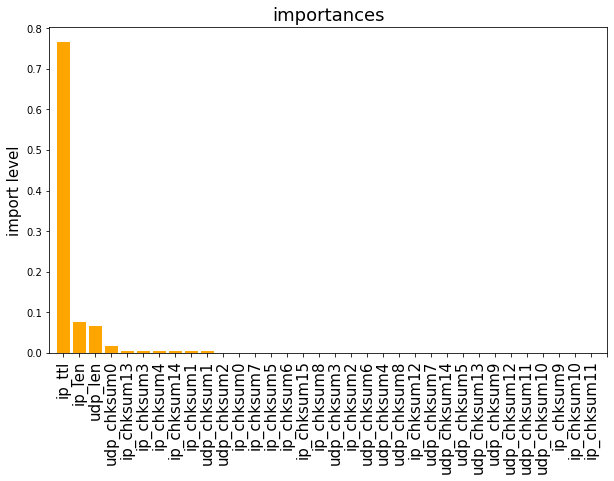

In [ ]:
threshold = 0.15
x_selected = x_train[:, importances > threshold]
plt.figure(figsize=(10, 6))
plt.title("importances", fontsize=18)
plt.ylabel("import level", fontsize=15, rotation=90)
plt.rcParams['font.sans-serif'] = ["SimHei"]
plt.rcParams['axes.unicode_minus'] = False
for i in range(10):
    plt.bar(i, importances[indices[i]], color='orange', align='center')
    plt.xticks(np.arange(x_columns.shape[0]), x_columns_indices, rotation=90, fontsize=15)
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [ ]:
accuracy_score(y_test, y_pred)

1.0

In [ ]:
confusion_matrix(y_test, y_pred)

array([[    1,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0],
       [    0,     6,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0],
       [    0,     0,     1,     0,     0,     0,     0,     0,     0,
            0,     0,     0],
       [    0,     0,     0,     2,     0,     0,     0,     0,     0,
            0,     0,     0],
       [    0,     0,     0,     0,     4,     0,     0,     0,     0,
            0,     0,     0],
       [    0,     0,     0,     0,     0,     3,     0,     0,     0,
            0,     0,     0],
       [    0,     0,     0,     0,     0,     0,   259,     0,     0,
            0,     0,     0],
       [    0,     0,     0,     0,     0,     0,     0,     4,     0,
            0,     0,     0],
       [    0,     0,     0,     0,     0,     0,     0,     0,   340,
            0,     0,     0],
       [    0,     0,     0,     0,     0,     0,     0,     0,     0,
        17447,     0

---
> 

In [ ]:
dataset = datahash
x=dataset.values[:,1:35]
y=dataset.values[:,0]
print(x.shape)
print(y.shape)

(225956, 11)
(225956,)


In [ ]:
from sklearn import preprocessing
# normalize the data attributes
normalized_x = preprocessing.normalize(x)

In [ ]:
normalized_x

array([[0.29992971, 0.25618996, 0.174959  , ..., 0.06873389, 0.06248536,
        0.06248536],
       [0.24576558, 0.23283055, 0.11641527, ..., 0.07114267, 0.06467515,
        0.06467515],
       [0.24576558, 0.23283055, 0.11641527, ..., 0.07114267, 0.06467515,
        0.06467515],
       ...,
       [0.15777553, 0.14947156, 0.07473578, ..., 0.        , 0.46087063,
        0.41519877],
       [0.19504317, 0.16717986, 0.10216547, ..., 0.46903238, 0.00464388,
        0.46903238],
       [0.16396989, 0.1553399 , 0.07766995, ..., 0.43149971, 0.43149971,
        0.43149971]])

In [ ]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(normalized_x, y, test_size = 0.2)

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
modelb = GaussianNB()
modelb.fit(x_train1, y_train1)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
y_pred1 = modelb.predict(x_test1)

In [ ]:
accuracy_score(y_test1, y_pred1)

0.9006461320587714

In [ ]:
confusion_matrix(y_test1, y_pred1)

array([[    0,     0,     0,     1,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0],
       [    0,     0,     0, 26401,     0,     0,     0,     0,     0,
            0,   315,     0,     0,    41],
       [    0,     0,     0,   282,     0,     0,     0,     0,     0,
            0,    17,     0,     0,    11],
       [    0,     0,  1222, 11907,     0,     0,     0,     0,     0,
         4190,    61,     0,     0,   136],
       [    0,     0,     1,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0],
       [    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     2,     0,     0,     0],
       [    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     2,     0,     0,     0],
       [    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     2,     0,     0,     0],
       [    0,     0,     2,     5,     0,     0,     0,     0,     0,
         

---

In [ ]:
from sklearn.svm import SVC
model = SVC()
model.fit(x_train1, y_train1)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred1 = model.predict(x_test1)

In [ ]:
accuracy_score(y_test1, y_pred1)

0.988338644007789

---

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD


model = Sequential()
# Dense(64) is a fully-connected layer with 64 hidden units.
model.add(Dense(64, activation='relu', input_dim=11))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(15, activation='softmax'))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

In [ ]:
y_train_h = keras.utils.to_categorical(y_train1, num_classes=15)
y_test_h = keras.utils.to_categorical(y_test1, num_classes=15)

In [ ]:
model.fit(x_train1, y_train_h,
          epochs=100,
          batch_size=35)

In [ ]:
score = model.evaluate(x_test1, y_test_h, batch_size=35)

1292/1292 [==============================] - 2s 2ms/step - loss: 0.0101 - accuracy: 0.9960


---

In [ ]:
datahash = cap[['device', 'ip_len', 'ip_ttl', 'udp_len']]

In [ ]:
def bin(x):
  digits = str('{0:016b}'.format(x))
  return digits

In [ ]:
def hash(s):
  shash = s[:3]
  return shash

In [ ]:
datahash = datahash.join(pd.DataFrame(cap["ip_chksum"].apply(bin).astype(str).str.findall("....").values.tolist()).add_prefix('ip_chksum'))
datahash = datahash.join(pd.DataFrame(cap["udp_chksum"].apply(bin).astype(str).str.findall("....").values.tolist()).add_prefix('udp_chksum'))
datahash.head()

,device,ip_len,ip_ttl,udp_len,ip_chksum0,ip_chksum1,ip_chksum2,ip_chksum3,udp_chksum0,udp_chksum1,udp_chksum2,udp_chksum3
0,10,48,41,28,1000,0100,0111,0100,1010,0110,0100,0100
0,13,38,36,18,1000,0100,0111,0100,1010,0110,0100,0100
0,13,38,36,18,1000,0100,0111,0100,1010,0110,0100,0100
0,10,48,44,28,1000,0100,0111,0100,1010,0110,0100,0100
0,11,32,63,12,1000,0100,0111,0100,1010,0110,0100,0100


In [ ]:
for col in ['ip_chksum0',	'ip_chksum1',	'ip_chksum2',	'ip_chksum3',	'udp_chksum0',	'udp_chksum1',	'udp_chksum2',	'udp_chksum3']:
  datahash[col] = datahash[col].apply(hash)
datahash.head()

,device,ip_len,ip_ttl,udp_len,ip_chksum0,ip_chksum1,ip_chksum2,ip_chksum3,udp_chksum0,udp_chksum1,udp_chksum2,udp_chksum3
0,10,48,41,28,100,010,011,010,101,011,010,010
0,13,38,36,18,100,010,011,010,101,011,010,010
0,13,38,36,18,100,010,011,010,101,011,010,010
0,10,48,44,28,100,010,011,010,101,011,010,010
0,11,32,63,12,100,010,011,010,101,011,010,010


In [ ]:
datahash.reset_index(drop=True)
datahash = datahash.astype(int)
datahash.describe()

,device,ip_len,ip_ttl,udp_len,ip_chksum0,ip_chksum1,ip_chksum2,ip_chksum3,udp_chksum0,udp_chksum1,udp_chksum2,udp_chksum3
count,225956.000000,225956.000000,225956.000000,225956.000000,225956.000000,225956.000000,225956.000000,225956.000000,225956.000000,225956.000000,225956.000000,225956.000000
mean,12.170684,38.765459,46.601073,18.765459,16.664191,7.245658,96.336110,85.634553,55.790946,58.514906,50.257174,60.541986
std,1.048580,7.477088,13.105836,7.477088,23.265596,26.171932,23.525262,41.121476,50.234023,49.586884,50.424019,49.552130
min,1.000000,32.000000,36.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11.000000,38.000000,36.000000,18.000000,11.000000,0.000000,101.000000,100.000000,1.000000,10.000000,1.000000,10.000000
50%,13.000000,38.000000,36.000000,18.000000,11.000000,0.000000,101.000000,101.000000,100.000000,100.000000,11.000000,100.000000
75%,13.000000,40.000000,63.000000,20.000000,11.000000,0.000000,101.000000,110.000000,101.000000,101.000000,101.000000,101.000000
max,14.000000,748.000000,114.000000,728.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000
